In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
#Graphics ---> SVG 
%config inlineBackend.figure_format = "svg"
#Disable Warnings
import warnings
warnings.filterwarnings('ignore')
# Increase the default plot size and set the color schemes
plt.rcParams['figure.figsize']= 8,5
plt.rcParams['image.cmap']= 'viridis'

In [2]:
consump = pd.read_csv("datasets_695144_1228449_long_data_.csv", parse_dates=["Dates"])
consump.head()

,States,Regions,latitude,longitude,Dates,MW usage
0,Punjab,NR,31.519974,75.980003,2019-02-01,119.9
1,Haryana,NR,28.450006,77.019991,2019-02-01,130.3
2,Rajasthan,NR,26.449999,74.639981,2019-02-01,234.1
3,Delhi,NR,28.669993,77.230004,2019-02-01,85.8
4,UP,NR,27.599981,78.050006,2019-02-01,313.9


In [3]:
consump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
States       16599 non-null object
Regions      16599 non-null object
latitude     16599 non-null float64
longitude    16599 non-null float64
Dates        16599 non-null datetime64[ns]
MW usage     16599 non-null float64
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 778.2+ KB


In [4]:
consump['States']= consump['States'].astype('category')
consump.head()

,States,Regions,latitude,longitude,Dates,MW usage
0,Punjab,NR,31.519974,75.980003,2019-02-01,119.9
1,Haryana,NR,28.450006,77.019991,2019-02-01,130.3
2,Rajasthan,NR,26.449999,74.639981,2019-02-01,234.1
3,Delhi,NR,28.669993,77.230004,2019-02-01,85.8
4,UP,NR,27.599981,78.050006,2019-02-01,313.9


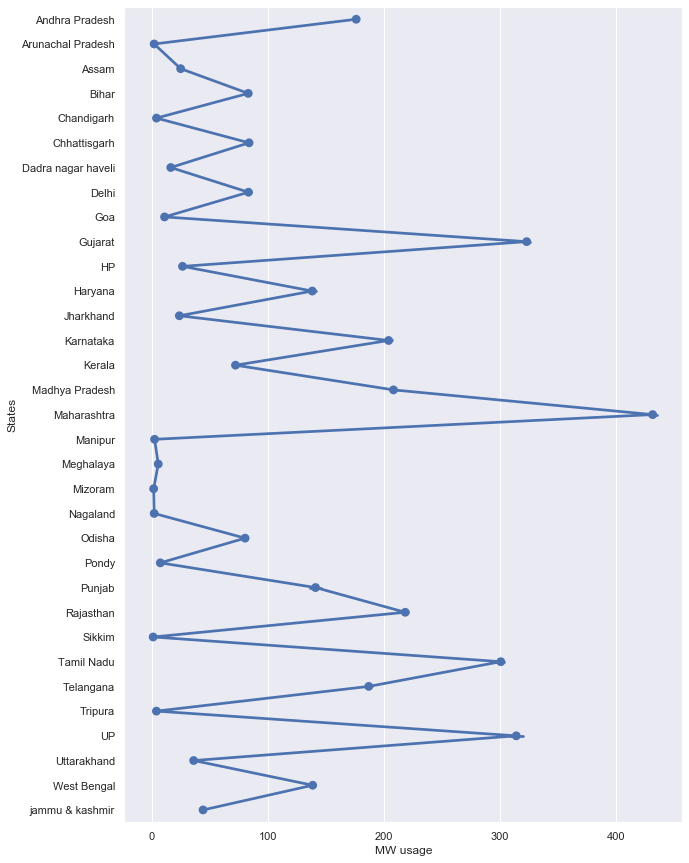

In [5]:
plt.rcParams['figure.figsize']= 10,15
plt.rcParams['image.cmap']= 'viridis'
sns.pointplot( consump['MW usage'],consump.States,data=consump)

In [6]:
consump['MW usage'].max()

522.1

In [7]:
consump['MW usage'].min()

0.3

In [8]:

MWrange =[] 
for x in consump['MW usage']:
    if x<=1 :
        MWrange.append("0-1")
    elif 1<x<5:
        MWrange.append("1-5")
    elif 5<x<10:
        MWrange.append("5-10")
    elif 10<x<50:
        MWrange.append("10-50")
    elif 50<x<100:
        MWrange.append("50-100")
    elif 100<x<200:
        MWrange.append("100-200")
    elif 200<x<300:
        MWrange.append("200-300")
    elif 300<x<400:
        MWrange.append("300-400")
    else:
        MWrange.append("400-500")
consump["MWRange"]= MWrange


In [9]:
consump.head()

,States,Regions,latitude,longitude,Dates,MW usage,MWRange
0,Punjab,NR,31.519974,75.980003,2019-02-01,119.9,100-200
1,Haryana,NR,28.450006,77.019991,2019-02-01,130.3,100-200
2,Rajasthan,NR,26.449999,74.639981,2019-02-01,234.1,200-300
3,Delhi,NR,28.669993,77.230004,2019-02-01,85.8,50-100
4,UP,NR,27.599981,78.050006,2019-02-01,313.9,300-400


In [10]:
consump.MWRange = consump['MWRange'].astype("category")

In [11]:
consump.head()

,States,Regions,latitude,longitude,Dates,MW usage,MWRange
0,Punjab,NR,31.519974,75.980003,2019-02-01,119.9,100-200
1,Haryana,NR,28.450006,77.019991,2019-02-01,130.3,100-200
2,Rajasthan,NR,26.449999,74.639981,2019-02-01,234.1,200-300
3,Delhi,NR,28.669993,77.230004,2019-02-01,85.8,50-100
4,UP,NR,27.599981,78.050006,2019-02-01,313.9,300-400


In [12]:
consump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 7 columns):
States       16599 non-null category
Regions      16599 non-null object
latitude     16599 non-null float64
longitude    16599 non-null float64
Dates        16599 non-null datetime64[ns]
MW usage     16599 non-null float64
MWRange      16599 non-null category
dtypes: category(2), datetime64[ns](1), float64(3), object(1)
memory usage: 682.8+ KB


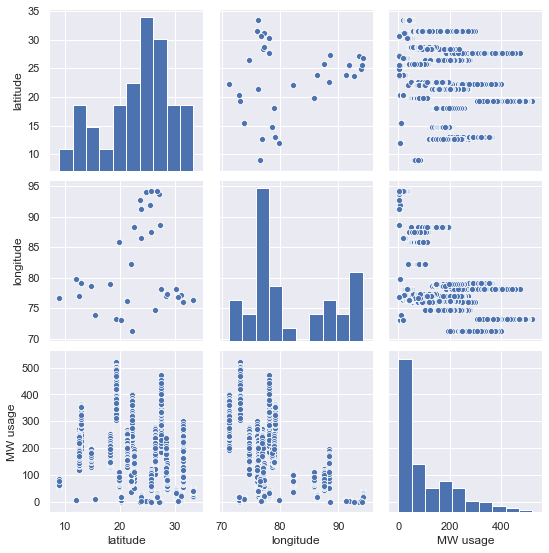

In [13]:
%config inlineBackend.figure_format = "png"
sns.pairplot(consump[['latitude','longitude','MW usage']]);

In [14]:
consump.States.unique()

[Punjab, Haryana, Rajasthan, Delhi, UP, ..., Manipur, Meghalaya, Mizoram, Nagaland, Tripura]
Length: 33
Categories (33, object): [Punjab, Haryana, Rajasthan, Delhi, ..., Meghalaya, Mizoram, Nagaland, Tripura]

In [35]:
S = consump.groupby("States")
S

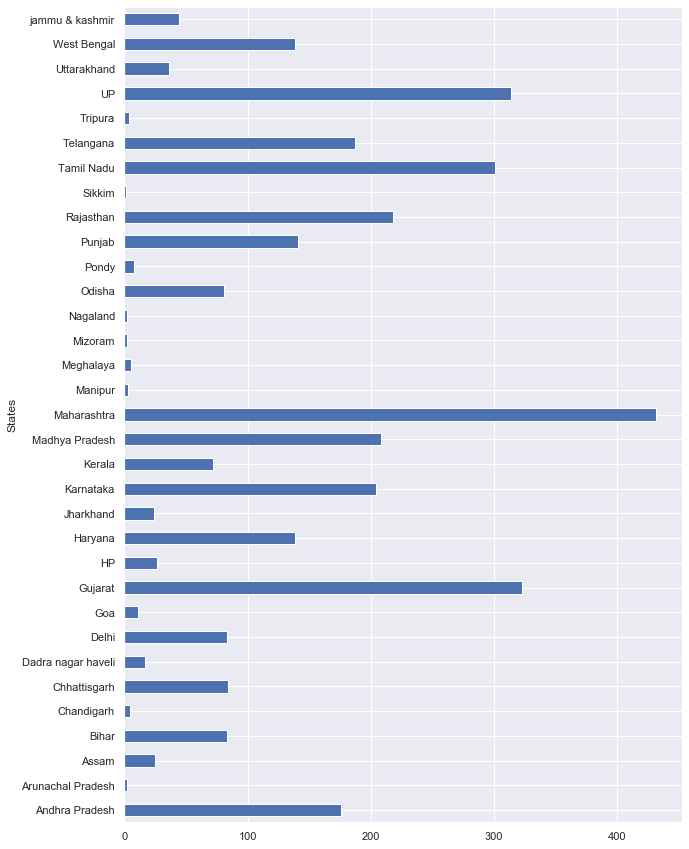

In [33]:
St =consump.groupby(['States'])['MW usage'].mean()
St.plot.barh()

In [17]:
State_codes = {'Punjab':'0','Haryana':'1','Rajasthan':'2','Delhi':'3','UP':'4','Uttarakhand':'5','HP':'6','jammu & kashmir':'7','Chandigarh':'8','Chhattisgarh':'9','Gujarat':'10','Madhya Pradesh':'11','Maharashtra':'12','Goa':'13','Dadra nagar haveli':'14','Andhra Pradesh':'15','Telangana':'16','Karnataka':'17','Kerala':'18','Tamil Nadu':'19','Pondy':'20','Bihar':'21',
'Jharkhand':'22','Odisha':'23','West Bengal':'24','Sikkim':'25','Arunachal Pradesh':'26','Assam':'27','Manipur':'28','Meghalaya':'29','Mizoram':'30','Nagaland':'31','Tripura':'32'}

In [18]:
StateCode = [State_codes[item] for item in consump.States]

In [19]:
consump['State_code']= StateCode
consump.head()

,States,Regions,latitude,longitude,Dates,MW usage,MWRange,State_code
0,Punjab,NR,31.519974,75.980003,2019-02-01,119.9,100-200,0
1,Haryana,NR,28.450006,77.019991,2019-02-01,130.3,100-200,1
2,Rajasthan,NR,26.449999,74.639981,2019-02-01,234.1,200-300,2
3,Delhi,NR,28.669993,77.230004,2019-02-01,85.8,50-100,3
4,UP,NR,27.599981,78.050006,2019-02-01,313.9,300-400,4


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
consump = consump.drop(['States','Regions','MWRange'], axis=1)
consump.head()

,latitude,longitude,Dates,MW usage,State_code
0,31.519974,75.980003,2019-02-01,119.9,0
1,28.450006,77.019991,2019-02-01,130.3,1
2,26.449999,74.639981,2019-02-01,234.1,2
3,28.669993,77.230004,2019-02-01,85.8,3
4,27.599981,78.050006,2019-02-01,313.9,4


In [22]:
consump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 5 columns):
latitude      16599 non-null float64
longitude     16599 non-null float64
Dates         16599 non-null datetime64[ns]
MW usage      16599 non-null float64
State_code    16599 non-null object
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 648.5+ KB


In [24]:
consump.State_code = consump.State_code.astype(int)

In [25]:
import datetime as dt
consump['Dates'] = pd.to_datetime(consump.Dates)
consump.Dates = consump['Dates'].map(dt.datetime.toordinal)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x = consump.drop(['State_code'], axis=1)
y = consump.State_code

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 2)

In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [30]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
x_train

,latitude,longitude,Dates,MW usage
2069,19.820430,85.900017,737243,75.1
7003,33.450000,76.240000,737098,45.9
10683,22.580390,88.329947,737388,128.7
16210,33.450000,76.240000,737525,45.9
3271,27.599981,78.050006,737163,407.9
...,...,...,...,...
14696,21.300391,76.130019,737539,230.6
1099,22.258700,71.192400,737181,229.7
11798,12.570381,76.919997,737423,191.6
6637,27.599981,78.050006,737262,267.7


In [32]:
model.predict(x_test)

array([ 3,  0, 21, ..., 12, 22, 23])

In [33]:
model.score(x_test, y_test)

1.0

In [34]:
x_test

,latitude,longitude,Dates,MW usage
13137,28.669993,77.230004,737478,106.7
7755,31.519974,75.980003,737297,114.0
945,25.785414,87.479973,737089,65.3
8907,23.710399,92.720015,737332,1.7
13227,26.749981,94.216667,737480,24.5
...,...,...,...,...
301,27.599981,78.050006,737364,281.4
9273,31.519974,75.980003,737345,153.8
5952,19.250232,73.160175,737217,424.0
8107,23.800393,86.419986,737188,23.7
